# Cyclistic Project

### About Company

A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic's users are more likely to ride for leisure, but about 30% use them to commute to work every day.

### Business Task

The company wants to improve their earnings reaching out to their “casual” riders, and for that they have to analyze in what aspects the “casual” and the annual customers differ, to be able to create a focused and successful marketing message to the “casual” customers that makes them change to the annual subscription.


### Main Question:

  How do annual members and casual riders use Cyclistic bike differently?

### 1. Importing Libraries and Data

#### 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import glob

#### 1.2. Loading Data

In [2]:
all_files = [ i for i in glob.glob('data/trip_*.{}'.format('csv'))]
df = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


### 2. Explore the data set:

#### 2.1. Find out the number of rows and columns

In [4]:
df.shape

(5900385, 13)

The data set have 5,900,385 rows and 13 columns

#### 2.2. Checking data type

In [5]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### 3. Data Cleaning

#### 3.1. Finding missing values

In [6]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    836018
start_station_id      836015
end_station_name      892103
end_station_id        892103
start_lat                  0
start_lng                  0
end_lat                 5374
end_lng                 5374
member_casual              0
dtype: int64

<b>Problem:</b> start_station_name, start_station_id, end_station_name, end_station_id have many missing values. We will drop these columns.

In [7]:
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis= 1)

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,41.877850,-87.624080,41.884621,-87.627834,member


#### 3.2. Change column name

Change these columns name to make sense:
- rideable_type --> bike_type
- member_casual --> user_type

In [9]:
df.rename(columns={'rideable_type':'bike_type','member_casual':'user_type'},inplace= True)
df.head()

,ride_id,bike_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,user_type
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,41.877850,-87.624080,41.884621,-87.627834,member


#### 3.3. Data type:

Data type of started_at and ended_at are object, change to datetime type.

In [10]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ride_id     object        
 1   bike_type   object        
 2   started_at  datetime64[ns]
 3   ended_at    datetime64[ns]
 4   start_lat   float64       
 5   start_lng   float64       
 6   end_lat     float64       
 7   end_lng     float64       
 8   user_type   object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 405.1+ MB


#### 3.3. Finding duplicates:

In [11]:
# check duplicate values of ride_id
df['ride_id'].duplicated().sum()

9

In [12]:
# Remove duplicates values
df['ride_id'].drop_duplicates(inplace=True)

#### 3.3. Add Time columns:

In [13]:
# add time of day column
df['time_of_day'] = df['started_at'].dt.hour
# add day of week column
df['week_day'] = df['started_at'].dt.day_name()
# add day of week (number) column
df['day_week'] = df['started_at'].dt.dayofweek
# add ride_length column, use: minutes
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length'] = df['ride_length'].dt.total_seconds().div(60)
df['ride_length'] = df['ride_length'].round(3)
df.head()

,ride_id,bike_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,user_type,time_of_day,week_day,day_week,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:00,2022-01-13 12:02:00,42.012800,-87.665906,42.012560,-87.674367,casual,11,Thursday,3,3.0
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:00,2022-01-10 08:46:00,42.012763,-87.665967,42.012560,-87.674367,casual,8,Monday,0,5.0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:00,2022-01-25 04:58:00,41.925602,-87.653708,41.925330,-87.665800,member,4,Tuesday,1,5.0
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:00,2022-01-04 00:33:00,41.983593,-87.669154,41.961507,-87.671387,casual,0,Tuesday,1,15.0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:00,2022-01-20 01:37:00,41.877850,-87.624080,41.884621,-87.627834,member,1,Thursday,3,6.0


In [14]:
df.sort_values(by = 'ride_length')

,ride_id,bike_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,user_type,time_of_day,week_day,day_week,ride_length
2095200,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,41.930000,-87.790000,41.930000,-87.790000,casual,19,Tuesday,1,-137.417
1635637,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,41.900000,-87.740000,41.910000,-87.740000,casual,19,Tuesday,1,-130.033
1810805,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,41.917831,-87.653363,41.920000,-87.650000,member,19,Tuesday,1,-129.083
1636060,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,41.920000,-87.650000,41.920000,-87.650000,casual,19,Tuesday,1,-127.017
2085979,BBD84670E05463A9,electric_bike,2022-06-07 19:11:33,2022-06-07 17:05:24,41.920000,-87.720000,41.930000,-87.720000,casual,19,Tuesday,1,-126.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022195,A310C7270FD730B6,docked_bike,2021-10-02 18:35:36,2021-10-31 01:00:37,41.886976,-87.612813,41.903222,-87.634324,casual,18,Saturday,5,40705.017
2610122,D4E35EE211346690,docked_bike,2021-07-10 15:59:21,2021-08-07 22:43:57,41.886976,-87.612813,42.004550,-87.680666,casual,15,Saturday,5,40724.600
3293853,E25E58F5E94EE351,docked_bike,2021-08-01 18:53:10,2021-08-30 16:42:20,41.877850,-87.624080,41.884241,-87.629634,casual,18,Sunday,6,41629.167
2294766,89F33397EABB55E7,docked_bike,2021-07-08 15:13:08,2021-08-06 13:18:39,41.892278,-87.612043,41.834900,-87.617930,casual,15,Thursday,3,41645.517


Its seen that many rows in some months contained negative values. 


In [15]:
# Number of rows containing "ride length" less than "0" minute.
df[df['ride_length'] < 0].count()

ride_id        146
bike_type      146
started_at     146
ended_at       146
start_lat      146
start_lng      146
end_lat        146
end_lng        146
user_type      146
time_of_day    146
week_day       146
day_week       146
ride_length    146
dtype: int64

In [16]:
# Number of rows containing "ride length" less than "1" minute.
df[df['ride_length']<1].count()

ride_id        98694
bike_type      98694
started_at     98694
ended_at       98694
start_lat      98694
start_lng      98694
end_lat        98673
end_lng        98673
user_type      98694
time_of_day    98694
week_day       98694
day_week       98694
ride_length    98694
dtype: int64

In [17]:
#remove 98694 rows containing ride length less than 1 minute &  146 rows containing ride length negative values
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])


In [18]:
df[df['ride_length']<1].count()

ride_id        0
bike_type      0
started_at     0
ended_at       0
start_lat      0
start_lng      0
end_lat        0
end_lng        0
user_type      0
time_of_day    0
week_day       0
day_week       0
ride_length    0
dtype: int64

We have now a complete data frame with all the information we need to identify the difference in behavior between the casual and the member user. 

### 4. Hypothesis:

There is several difference between 2 user type:
 - Bike type
 - Frequency of use by day of the week and day
 - Ride length

### 5. Analyze:

#### 5.1. Total user by User Type

Let's see how many users we have in total by user type

In [19]:
# create dataframe with total of user
df_user_type = df.groupby(['user_type'],as_index= False)['ride_id'].count()
# let's rename the columns so that they make sense
df_user_type.rename(columns={'ride_id':'total_user'},inplace=True)
# set User Type as index
df_user_type.set_index('user_type',inplace= True)
df_user_type


,total_user
user_type,
casual,2519341
member,3282350


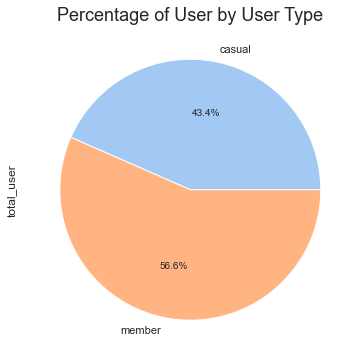

In [20]:
#Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set_theme(style="ticks", palette="pastel")

# plot Percentage of user by pie chart
df_user_type['total_user'].plot(kind='pie',
                            figsize=(10,6),
                            autopct='%1.1f%%')
plt.title('Percentage of User by User Type', fontsize=18)
plt.show()

#### 5.3 Finding difference in behavior between two user type

##### First, I would like to know the difference in bike usage trends between the two types of users

In [21]:
#check the bike type usage by user type
df_type= df[['user_type','bike_type','ride_id']]
df_type=df_type[df['bike_type'] != 'docked_bike']
df_bike_type = df_type.groupby(['user_type','bike_type'],as_index= False)['ride_id'].count()


In [22]:
# check the bike type usage by Casual user during a week
df_type_1 = df[df['user_type'] == 'casual']
df_type_1 = df_type_1[['week_day','bike_type','ride_id']]
df_type_1 = df_type_1[df_type_1['bike_type'] != 'docked_bike']
df_casual = df_type_1.groupby(['week_day','bike_type'], as_index=False)['ride_id'].count()
df_casual.rename(columns={'ride_id':'total_bike'}, inplace=True)


In [23]:
# check the bike type usage by Member during a week
df_type_2 = df[df['user_type'] == 'member']
df_type_2 = df_type_2[['week_day','bike_type','ride_id']]
df_member = df_type_2.groupby(['week_day','bike_type'], as_index=False)['ride_id'].count()
df_member.rename(columns={'ride_id':'total_bike'},inplace=True)

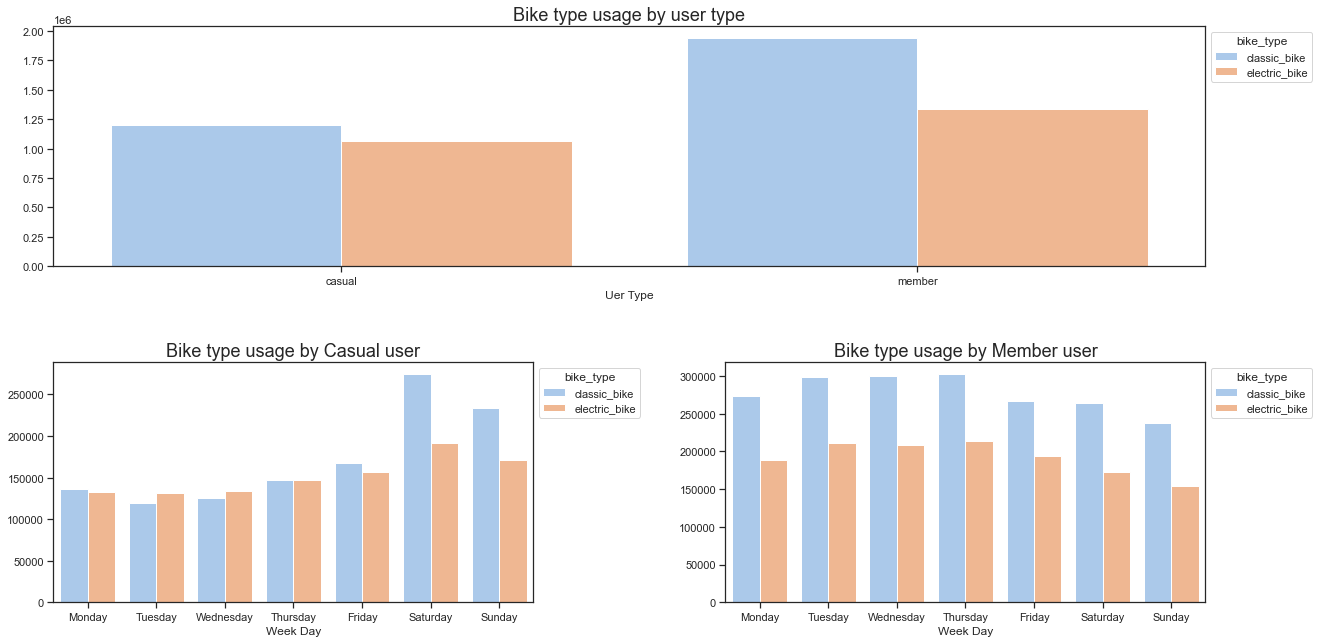

In [24]:

# We will create chart for 3 tables above

from matplotlib.pyplot import legend

# create figure
fig = plt.figure(figsize= (20,10))
ax0 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)

#Subplot 1: bike type usage by user type
sns.barplot(x='user_type',
            y='ride_id',
            hue='bike_type',
            data=df_bike_type,
            ax = ax0
            )
ax0.set_title("Bike type usage by user type", fontsize=18)
ax0.set_ylabel(None)
ax0.set_xlabel("Uer Type")
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))

#Subplot 2: bike type usage by Casual user during a week
sns.barplot(x='week_day',
            y='total_bike',
            hue = 'bike_type',
            data = df_casual,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            ax=ax1)
            
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax1.set_title("Bike type usage by Casual user", fontsize=18)
ax1.set_ylabel(None)
ax1.set_xlabel("Week Day")

# Subplot 3: bike type usage by Member during a week
sns.barplot(x='week_day',
            y='total_bike',
            hue='bike_type',
            data=df_member,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            ax=ax2
            )
ax2.set_title("Bike type usage by Member user", fontsize=18)
ax2.set_ylabel(None)
ax2.set_xlabel("Week Day")
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- Here we can see that the Casual user and Member use both of bikes for their rides, but Member show a clear preference for the classic bike 
- On a weekly basis we can see that Casual user prefer to use the bike on the weekend, while Member user prefers to use the bike (both electric and classic) between Monday and Friday.

##### Next, we will check the total ride during a week and total ride during a day

In [34]:
#create data frame for total ride by user type and week day
df_totalride_weekday = df[['week_day','day_week','user_type','ride_id']]
# rename the ride_id column to total_ride
df_totalride_weekday.rename(columns={'ride_id':'total_ride'},inplace=True)
df_totalride_weekday = df_totalride_weekday.groupby(['week_day','day_week','user_type'],as_index=False)['total_ride'].count().sort_values(by=['day_week'])

C:\Users\huylo\AppData\Local\Temp\ipykernel_5576\907731813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totalride_weekday.rename(columns={'ride_id':'total_ride'},inplace=True)


In [26]:
#create data frame for total ride by user type and time of day
df_totalride_daytime = df[['time_of_day','user_type','ride_id']]
df_totalride_daytime.rename(columns={'ride_id':'total_ride'},inplace=True)
df_totalride_daytime = df_totalride_daytime.groupby(['time_of_day','user_type'],as_index=False)['total_ride'].count()

C:\Users\huylo\AppData\Local\Temp\ipykernel_5576\3794634193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totalride_daytime.rename(columns={'ride_id':'total_ride'},inplace=True)


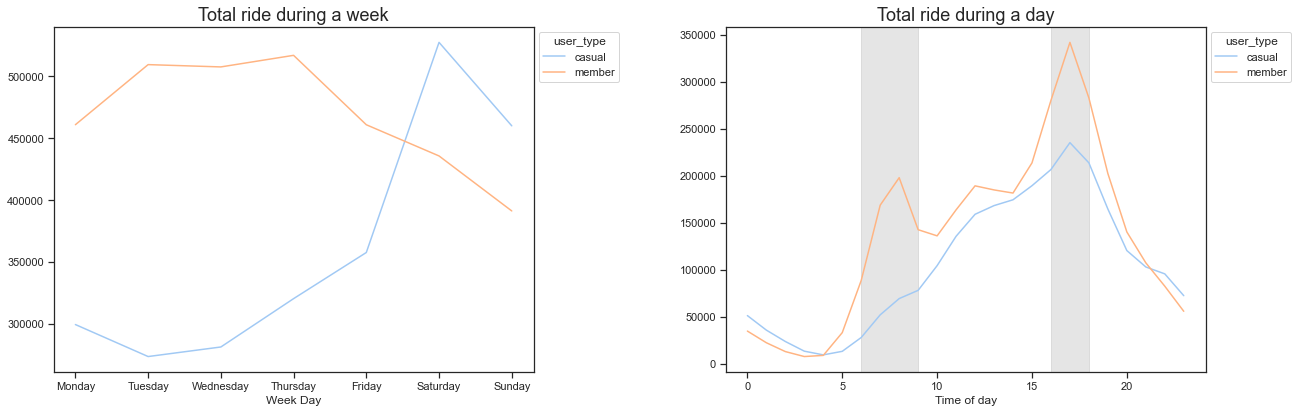

In [35]:
# Create chart for 2 information above

# create figure
fig1 = plt.figure(figsize= (20,6))

ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

#Subplot 1: Total ride during a Week
sns.lineplot(x='week_day',
            y='total_ride',
            hue = 'user_type',
            data = df_totalride_weekday,
            ax = ax0)

sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
ax0.set_title("Total ride during a week", fontsize=18)
ax0.set_ylabel(None)
ax0.set_xlabel("Week Day")

#subplot 2: Total ride during a day
sns.lineplot(x='time_of_day',
            y='total_ride',
            hue='user_type',
            data=df_totalride_daytime,
            ax=ax1)

sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.axvspan(6, 9, color='gray', alpha=0.2 )
plt.axvspan(16, 18, color='gray', alpha=0.2 )
ax1.set_title("Total ride during a day", fontsize=18)
ax1.set_ylabel(None)
ax1.set_xlabel("Time of day")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()



- We found that Member user tend to use the service more from Monday to Friday and decrease on weekend. While Casual user tend to use the service higher on weekend.
- During a day, Member user use more service between 6 a.m to 9 a.m and 4 p.m to 6 p.m. While Casual user prefer riding in the afternoon
- From these insight, I assumpt that Member user use bike to go to work, while Casual user use bike for other purpose.

##### Next, we will analyze average ride time by user type and average ride time per weekday

In [28]:
# find average ride time by user type
df_avg_time = df[['user_type','ride_length']]
df_avg_time = df_avg_time.groupby(['user_type'],as_index=False)['ride_length'].mean()
df_avg_time['ride_length'] = df_avg_time['ride_length'].round(3)

In [29]:
#find average ride time by weekday
df_avg_time_weekday = df[['week_day','day_week','user_type','ride_length']]
df_avg_time_weekday = df_avg_time_weekday.groupby(['week_day','day_week','user_type'], as_index=False)['ride_length'].mean().sort_values(by=['day_week'])
df_avg_time_weekday['ride_length'] = df_avg_time_weekday['ride_length'].round(3)

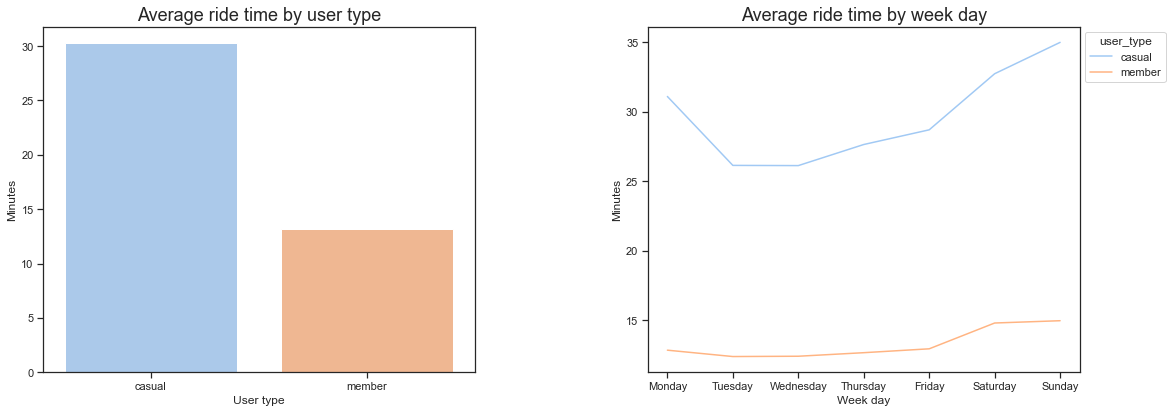

In [30]:
# Create chart for 2 informations above

#create figure
fig2 = plt.figure(figsize=(18,6))

ax0 = fig2.add_subplot(1,2,1)
ax1 = fig2.add_subplot(1,2,2)

#Subplot 1: Average ride time by user type
sns.barplot(x = 'user_type',
            y = 'ride_length',
            data = df_avg_time,
            ax=ax0
            )
ax0.set_title("Average ride time by user type", fontsize=18)
ax0.set_ylabel("Minutes")
ax0.set_xlabel("User type")

#Subplot 2: Average ride time by week day
sns.lineplot(x='week_day',
            y='ride_length',
            hue='user_type',
            data=df_avg_time_weekday,
            sort= False,
            ax=ax1)

sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
ax1.set_title("Average ride time by week day", fontsize=18)
ax1.set_ylabel("Minutes")
ax1.set_xlabel("Week day")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- Causual user's average ride time is about 30 minutes and Member user's average ride time is about 13 minutes.
- Member user' average ride time is about 13 minutes between Monday to Friday and increases on Saturday and Sunday. While Casual user increase gradually from Tuesday to Sunday. (from 26 minutes to 35 minutes). 
That would indicate that the Casual user uses it for leisure-oriented rather than public transport.

There are Cyclistic's pricing plan:
- Single ride: 1 USD to unlock and 0,16 USD/minute
- Day pass: 15 USD/day
- Member: 10 USD/month

Casual user should register as a Annual Member to save more money

### 6. Conclusion:

- <b>Insight 1:</b> 
    + Member users show a clear preference for the classic.
    + Casual users prefer to use the bike on the weekend, while Member user prefers to use the bike between Monday and Friday.
- <b> Insight 2: </b> 
    + Member users tend to use the service more from Monday to Friday and less on the weekend. While Casual user tend to use the service higher on the weekend.
    + Member users use more service between 6 a.m to 9 a.m and 4 p.m to 6 p.m. While Casual users prefer riding in the afternoon.
- <b>Insight 3:</b>
    + Member user' average ride time is about 13 minutes between Monday to Friday and increases on Saturday and Sunday. While Casual user increase gradually from Tuesday to Sunday (from 26 minutes to 35 minutes). 
That would indicate that the Casual user uses it for leisure-oriented rather than public transport.


### 7. Recommendations:

In order to convert non-member user to annual member, I recommend some solutions:
- Showing the casual rider the up-front benefit (maybe offering promotion) during weekday ride and sustainably change their behavior into daily rider
- Offering some kind of promotion in the afternoon time slot.
- The pricing plan also a reason for the Casual user to sign up for a membership.